In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_marketplace = pd.read_csv('marketplace.csv')
data_marketplace.head()

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
0,3/11/2020,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
1,3/26/2020,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
2,3/23/2020,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
3,4/29/2020,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
4,4/15/2020,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


# **1. Observasi dataset dan mendeteksi kolom yang tidak memiliki nilai duplikat**

In [ ]:
data_marketplace.shape

(26014, 16)

In [ ]:
duplikat = data_marketplace[data_marketplace.duplicated()]
print("Jumlah baris data yang duplikat : ", duplikat.shape)

Jumlah baris data yang duplikat :  (0, 16)


Ket: tidak ada data duplikat dalam baris tersebut

Mendeteksi kolom yang berisi data duplikat

In [ ]:
def getDuplicateColumns(df):
  kolomDuplikat = set()
  for i in range(df.shape[1]):
    kolom = df.iloc[:, i]
    for j in range(i+1, df.shape[1]):
      kolomPembanding = df.iloc[:, j]
      if kolom.equals(kolomPembanding):
        kolomDuplikat.add(df.columns.values[j])
  return list(kolomDuplikat)

kolomDuplikat = getDuplicateColumns(data_marketplace)
if len(kolomDuplikat) !=0:
  print("Kolom yang duplikat adalah: ")
  for kolom in kolomDuplikat:
    print(kolom)
else:
  print("Tidak ada kolom duplikat")

Tidak ada kolom duplikat


In [ ]:
data_marketplace.nunique()

date                 41
sku_name          11397
product_id        12120
merchant_code      4094
merchant_badge        3
product_type        361
merchant_city       136
cod                   2
price              3224
stock               799
daily_gmv          2760
daily_sold          137
daily_view          909
rating               30
total_review        558
total_sold         1267
dtype: int64

Total data keseluruhan adalah 26014, namun jumlah data product ID adalah 12120, ini artinya masih terdapat data yang sama.

Untuk melihat data apa saja yang sama:

In [ ]:
data_marketplace[data_marketplace.duplicated(subset='product_id', keep = False)].sort_values('product_id')

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
42,4/20/2020,Oppo F3 Ram 4gb Rom 64gb Garansi Resmi,A1,11.0,RM,Oppo F3,Kota Tangerang Selatan,False,3149000,999999,0,0,9,90,238,395
51,4/21/2020,Oppo F3 Ram 4gb Rom 64gb Garansi Resmi,A1,11.0,RM,Oppo F3,Kota Tangerang Selatan,False,3149000,999999,0,0,8,90,238,395
197,4/17/2020,Oppo F3 Ram 4gb Rom 64gb Garansi Resmi,A1,11.0,RM,Oppo F3,Kota Tangerang Selatan,False,3149000,999999,0,0,4,90,238,395
165,4/28/2020,Oppo F1s Ram 3/32gb Gold dan Rose gold Garansi...,A10,10.0,RM,Oppo F1s,Kota Tangerang Selatan,False,2950000,999999,0,0,1,96,57,81
176,4/17/2020,Oppo F1s Ram 3/32gb Gold dan Rose gold Garansi...,A10,10.0,RM,Oppo F1s,Kota Tangerang Selatan,False,2950000,999999,0,0,1,96,57,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14607,4/30/2020,NEW iPhone 11 64GB DUAL SIM - Black White Red ...,H4,2446.0,PM,Apple iPhone 11,Kota Administrasi Jakarta Pusat,False,14192000,5,0,0,3,97,7,7
14624,4/29/2020,NEW iPhone 11 64GB DUAL SIM - Black White Red ...,H4,2446.0,PM,Apple iPhone 11,Kota Administrasi Jakarta Pusat,False,14192000,5,0,0,3,97,7,7
14632,4/25/2020,NEW iPhone 11 64GB DUAL SIM - Black White Red ...,H4,2446.0,PM,Apple iPhone 11,Kota Administrasi Jakarta Pusat,False,14192000,5,0,0,0,97,7,7
14691,4/30/2020,HDC IPHONE 11 3G - Abu-abu,H5,3195.0,PM,Apple iPhone 11,Kota Administrasi Jakarta Barat,False,1500000,98,0,0,102,98,15,51


# **2. Tipe Data**

In [ ]:
data_marketplace.dtypes

date               object
sku_name           object
product_id         object
merchant_code     float64
merchant_badge     object
product_type       object
merchant_city      object
cod                  bool
price               int64
stock               int64
daily_gmv           int64
daily_sold          int64
daily_view          int64
rating              int64
total_review        int64
total_sold          int64
dtype: object

In [ ]:
data_marketplace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26014 entries, 0 to 26013
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            26014 non-null  object 
 1   sku_name        26014 non-null  object 
 2   product_id      26014 non-null  object 
 3   merchant_code   26007 non-null  float64
 4   merchant_badge  26014 non-null  object 
 5   product_type    26014 non-null  object 
 6   merchant_city   26014 non-null  object 
 7   cod             26014 non-null  bool   
 8   price           26014 non-null  int64  
 9   stock           26014 non-null  int64  
 10  daily_gmv       26014 non-null  int64  
 11  daily_sold      26014 non-null  int64  
 12  daily_view      26014 non-null  int64  
 13  rating          26014 non-null  int64  
 14  total_review    26014 non-null  int64  
 15  total_sold      26014 non-null  int64  
dtypes: bool(1), float64(1), int64(8), object(6)
memory usage: 3.0+ MB


Ket: pada merchant code masih terdapat data yang Null/Nan. Oleh karena itu sebelum mengubah merchant_code menjadi integer perlu mengubah data NaN tersebut menjadi 0

# **3. Mendeteksi data kosong dan mengisinya dengan 0**

In [ ]:
data_marketplace.isnull().sum()

date              0
sku_name          0
product_id        0
merchant_code     7
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

In [ ]:
data_marketplace['merchant_code'].fillna(0, inplace=True)
data_marketplace.isnull().sum()

date              0
sku_name          0
product_id        0
merchant_code     0
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

# **Lanjutan yg no 2 td : mengubah tipe data merchant_code menjadi integer**

In [ ]:
data_marketplace['merchant_code'] = data_marketplace['merchant_code'].astype('int')
data_marketplace.dtypes

date              object
sku_name          object
product_id        object
merchant_code      int64
merchant_badge    object
product_type      object
merchant_city     object
cod                 bool
price              int64
stock              int64
daily_gmv          int64
daily_sold         int64
daily_view         int64
rating             int64
total_review       int64
total_sold         int64
dtype: object

# **4. Jenis Produk Kategori yang Dijual**

In [ ]:
data_marketplace['product_type'].unique()

array(['Huawei nova 5T', 'Nokia 1', 'Oppo A7', 'Oppo A9', 'Oppo F3',
       'Oppo F5', 'Oppo F7', 'vivo S1', 'vivo V5', 'vivo V7', 'vivo V9',
       'Honor 7S', 'Oppo A1k', 'Oppo A37', 'Oppo A39', 'Oppo A3s',
       'Oppo A57', 'Oppo A83', 'Oppo A91', 'Oppo F11', 'Oppo F1s',
       'Realme 2', 'Realme 6', 'vivo V15', 'vivo Y12', 'vivo Y15',
       'vivo Y17', 'vivo Y19', 'vivo Y71', 'vivo Y81', 'vivo Y83',
       'vivo Y93', 'vivo Y95', 'Realme C1', 'Vivo Y91C', 'Infinix S5',
       'vivo NEX A', 'vivo Z1Pro', 'Oppo Reno A', 'Apple iPhone',
       'Oppo F1 Plus', 'Oppo F11 Pro', 'Oppo F3 Plus', 'Oppo Reno2 F',
       'vivo V15 Pro', 'vivo V17 Pro', 'vivo V5 Plus', 'Huawei nova 2',
       'Infinix Hot 5', 'Infinix Hot 8', 'Oppo A5 (AX5)', 'Oppo F5 Youth',
       'Xiaomi Mi Max', 'vivo iQOO Pro', 'Apple iPhone 4',
       'Apple iPhone 5', 'Apple iPhone 6', 'Apple iPhone 7',
       'Apple iPhone 8', 'Apple iPhone X', 'Huawei Mate 10',
       'Huawei P20 Pro', 'Huawei nova 3i', 'Infinix Ho

# **5. Tiga Produk Teratas dalam Penjualan**

In [ ]:
data_marketplace.groupby('product_type')['total_sold'].sum().sort_values(ascending=False).head(3)

product_type
Samsung Galaxy A10s    525852
Xiaomi Redmi 6A        332426
Realme 6               277352
Name: total_sold, dtype: int64

# **6. Produk Teratas Pertama: Harga rata-rata, variasi harga jual, Visualisasi Distribusi dengan Histogram**

In [ ]:
teratas = data_marketplace[data_marketplace['product_type'] == "Samsung Galaxy A10s"]
teratas

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
2554,4/8/2020,Samsung A10S 2/32 garansi resmi - Random,E159,676,RM,Samsung Galaxy A10s,Kab. Bantul,False,1581000,0,1581000,1,19,100,50,186
2555,4/26/2020,SAMSUNG GALAXY A10S 2GB 32GB GARANSI RESMI SEIN,E160,43,RM,Samsung Galaxy A10s,Kota Administrasi Jakarta Utara,False,1650000,17,0,0,2,99,25,26
2556,4/18/2020,Samsung A10s New Garansi Resmi,F122,677,RM,Samsung Galaxy A10s,Kab. Bantul,False,1609400,10,0,0,2,100,21,73
2557,4/15/2020,SAMSUNG GALAXY A10S - [2/32] - GARANSI RESMI S...,E161,678,RM,Samsung Galaxy A10s,Kota Administrasi Jakarta Utara,False,1589900,3,0,0,11,100,21,329
2558,4/14/2020,Samsung A10s New Garansi Resmi,F122,677,RM,Samsung Galaxy A10s,Kab. Bantul,False,1609400,10,0,0,7,100,21,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,4/4/2020,Samsung Galaxy A10s 2/32 RAM 2GB ROM 32GB GARA...,E3287,805,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1621000,7,25936000,16,565,98,529,4100
25327,4/6/2020,Samsung Galaxy A10s 2/32 2GB 32GB Garansi Resm...,E328,819,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1650000,8,3300000,2,236,94,35,241
25328,4/18/2020,Samsung Galaxy A10S Smartphone [32GB/ 2GB] Red...,E324,822,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1629000,18,3258000,2,32,98,36,203
25329,4/27/2020,Samsung Galaxy A10S Smartphone [32GB/ 2GB] Bla...,E3281,822,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1635000,20,0,0,663,99,203,1431


In [ ]:
rata_rata = teratas['price'].mean()
print("Harga Rata-rata : ", rata_rata)

Harga Rata-rata :  1622650.8446327683


**Distribusi Harga dengan Histogram**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


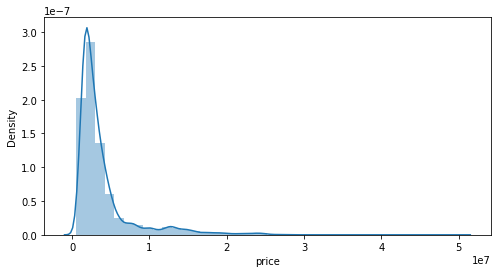

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(data_marketplace['price'], bins=40)

# **7. Filter dataset hanya Samsung Galaxy A10s, temukan 3 kota pedagang terlaris, box plot distribusi harga**

In [ ]:
filter = data_marketplace[data_marketplace['product_type'] == "Samsung Galaxy A10s"]
filter.groupby("merchant_city")['total_sold'].mean().sort_values(ascending=False).head(3)

merchant_city
Kota Tangerang                     1066.743590
Kab. Bantul                         781.203390
Kota Administrasi Jakarta Pusat     751.294737
Name: total_sold, dtype: float64

**Boxplot**

AxesSubplot(0.125,0.125;0.775x0.755)


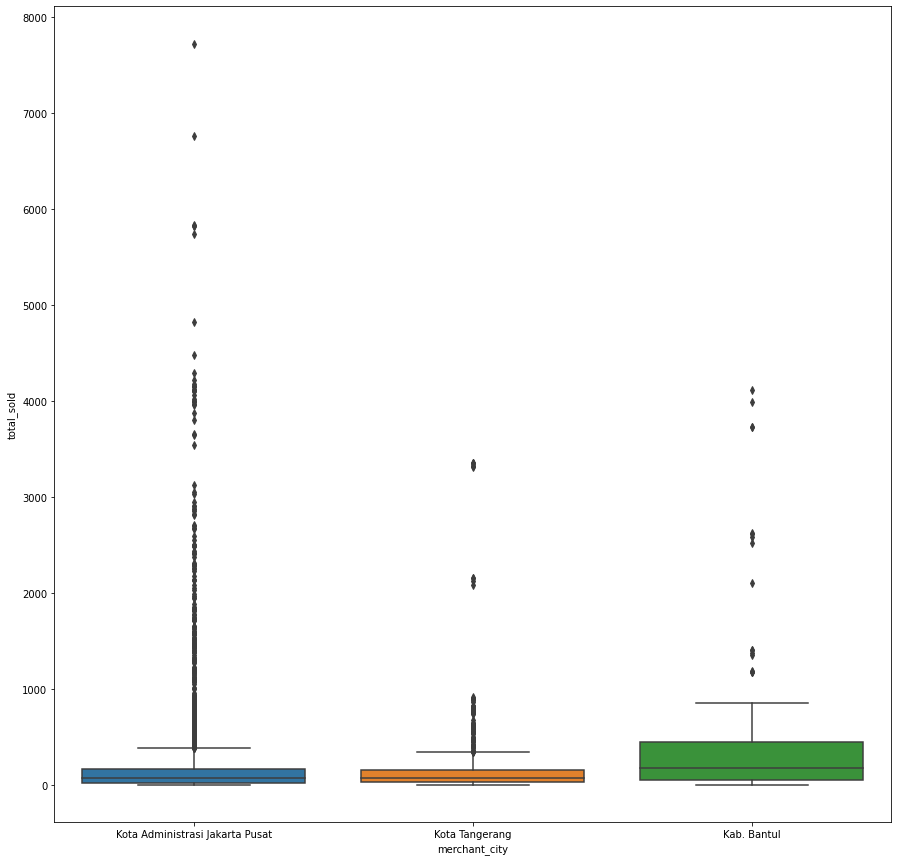

In [ ]:
list_kota = ['Kota Tangerang', 'Kab. Bantul', 'Kota Administrasi Jakarta Pusat']
filter_kota = data_marketplace[data_marketplace['merchant_city'].isin(list_kota)]
plt.figure(figsize=(15,15))
boxplot = sns.boxplot(x="merchant_city", y="total_sold", data=filter_kota)
print(boxplot)

# **8. Uji perbedaan total_sold Samsung Galaxy A10s dengan Xiaomi Redmi 6A menggunakan t-sample test**

H0: Penjualan Samsung Galaxy A10s = Xiaomi Redmi 6A

H1: Penjualan Samsung Galaxy A10s != Xiaomi Redmi 6A

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
product_samsung = data_marketplace[data_marketplace['product_type'] == 'Samsung Galaxy A10s']['total_sold']
product_xiaomi = data_marketplace[data_marketplace['product_type'] == 'Xiaomi Redmi 6A']['total_sold']

samsung_mean = np.mean(product_samsung)
xiaomi_mean = np.mean(product_xiaomi)

print("Rata-rata Penjualan Samsung Galaxy A10: ", samsung_mean)
print("Rata-rata Penjualan Xiaomi Redmi 6A: ", xiaomi_mean)

samsung_std = np.std(product_samsung)
xiaomi_std = np.std(product_xiaomi)

print("Standar Deviasi Samsung Galaxy A10: ", samsung_std)
print("Standar Deviasi Xiaomi Redmi 6A: ", xiaomi_std)

ttest,pval = ttest_ind(product_samsung, product_xiaomi)
print("p-value ", pval)

if pval < 0.05:
  print("Hipotesis null ditolak")
else:
  print("Hipotesis null diterima")

Rata-rata Penjualan Samsung Galaxy A10:  495.1525423728813
Rata-rata Penjualan Xiaomi Redmi 6A:  445.0147255689424
Standar Deviasi Samsung Galaxy A10:  626.3434790554674
Standar Deviasi Xiaomi Redmi 6A:  580.394664272472
p-value  0.08442284533312362
Hipotesis null diterima


Jika Hipotesis null diterima, artinya tidak ada perbedaan yang signifikan antara total penjualan dari samsung galaxy A10s dan Xiaomi Redmi 6A

# **9. Kesimpulan**

1. Tiga produk teratas dalam penjualan Samsung Galaxy A10s, Xiaomi Redmi 6A, dan Redmi6

2. Kota yang menjual produk Samsung Galaxy A10s dengan rata-rata penjualan terbanyak: Kota Tangerang, Kab. Bantul, dan Kota Administrasi Jakarta Pusat

3. Persebaran distribusi harga pada data tersebut condong ke kiri

4. Pada uji t antara total_sold Samsung Galaxy A10s dengan Xiaomi Redmi 6A menunjukkan bahwa hipotesis null diterima, ini artinya jumlah penjualan produk Samsung Galaxy A10s dan Xiaomi Redmi 6A tidak memiliki perbedaan yang signifikan